In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("disease_diagnosis.csv")

In [3]:
data.head(5)

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids


In [4]:
data.shape

(2000, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   Gender               2000 non-null   object 
 3   Symptom_1            2000 non-null   object 
 4   Symptom_2            2000 non-null   object 
 5   Symptom_3            2000 non-null   object 
 6   Heart_Rate_bpm       2000 non-null   int64  
 7   Body_Temperature_C   2000 non-null   float64
 8   Blood_Pressure_mmHg  2000 non-null   object 
 9   Oxygen_Saturation_%  2000 non-null   int64  
 10  Diagnosis            2000 non-null   object 
 11  Severity             2000 non-null   object 
 12  Treatment_Plan       2000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 203.3+ KB


In [6]:
data.describe()

,Patient_ID,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.285000,89.439000,37.741000,94.493500
std,577.494589,17.422616,17.139608,1.309835,2.861827
min,1.000000,18.000000,60.000000,35.500000,90.000000
25%,500.750000,33.000000,75.000000,36.600000,92.000000
50%,1000.500000,49.000000,89.000000,37.700000,95.000000
75%,1500.250000,63.000000,104.000000,38.900000,97.000000
max,2000.000000,79.000000,119.000000,40.000000,99.000000


In [7]:
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Heart_Rate_bpm         0
Body_Temperature_C     0
Blood_Pressure_mmHg    0
Oxygen_Saturation_%    0
Diagnosis              0
Severity               0
Treatment_Plan         0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

<Axes: ylabel='Age'>

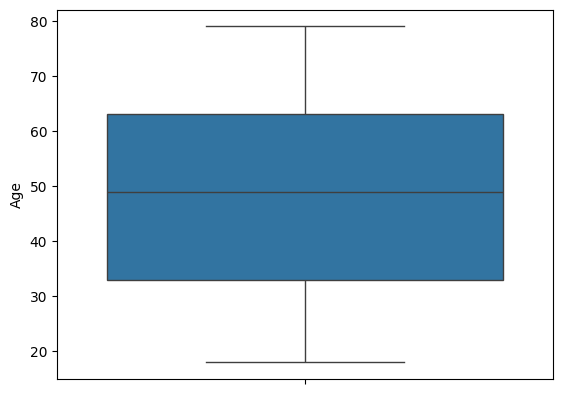

In [11]:
print("There is no outliers detection from the Age Feaature")
sns.boxplot(data["Age"])

In [12]:
# here from the data set we are taking the diagonsis as output and here we are preforming the Label Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

lb = LabelEncoder()
y = lb.fit_transform(data["Diagnosis"])

In [15]:
# here we are dropoping the Diagnisis feature 
x = data.drop(["Diagnosis","Patient_ID"],axis = 1)

In [16]:
data.head()

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids


In [17]:
# here we are creating the separate varibles such as like numerical as well as categorical values

categorical_cols = ["Gender", "Symptom_1", "Symptom_2", "Symptom_3", "Severity", "Treatment_Plan"]
numerical_cols = ["Age", "Heart_Rate_bpm", "Body_Temperature_C", "Oxygen_Saturation_%"]

In [19]:
# here we are using Column Transformer for handling onehotencoder, labelencoding in one stage
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", "passthrough", numerical_cols)
])

In [20]:
x_preprocessor = preprocessor.fit_transform(x)

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x_preprocessor,y, test_size = 0.2,random_state = 42)

In [41]:
from sklearn.naive_bayes import GaussianNB

# here we are preforming the naive bayes alogrthim 
nb = GaussianNB()
nb.fit(xtrain.toarray() if hasattr(xtrain, "toarray") else xtrain, ytrain)

# Predict
ypred = nb.predict(xtest.toarray() if hasattr(xtest, "toarray") else xtest)

In [42]:
from sklearn.metrics import classification_report, accuracy_score
print("The Accuracy Score is :",accuracy_score(ytest,ypred))

The Accuracy Score is : 0.945


In [43]:
print("The Classification Report is:", classification_report(ytest,ypred))

The Classification Report is:               precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.75      0.62      0.68        29
           2       1.00      1.00      1.00        58
           3       0.95      0.97      0.96       238
           4       0.75      0.82      0.78        11

    accuracy                           0.94       400
   macro avg       0.88      0.87      0.88       400
weighted avg       0.94      0.94      0.94       400

